The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [70]:
# Loading in required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Start coding here!

In [71]:
# Load and inspect the data
nobel = pd.read_csv('nobel.csv')
print(f'Shape of the dataset is {nobel.shape}')
print(f'Columns are : {nobel.columns}')
nobel.head()

Shape of the dataset is (1000, 18)
Columns are : Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


### Analyze Nobel Prize winner data and identify patterns by answering the following questions:

Q1. What is the most commonly awarded gender and birth country?

* Store your answers as string variables top_gender and top_country.

In [72]:
# find counts of sex and birth_country
top_gender = nobel['sex'].value_counts().index[0]
top_country = nobel['birth_country'].value_counts().index[0]
print(f'The top Gender is {top_gender}\nThe top Country is {top_country}')

The top Gender is Male
The top Country is United States of America


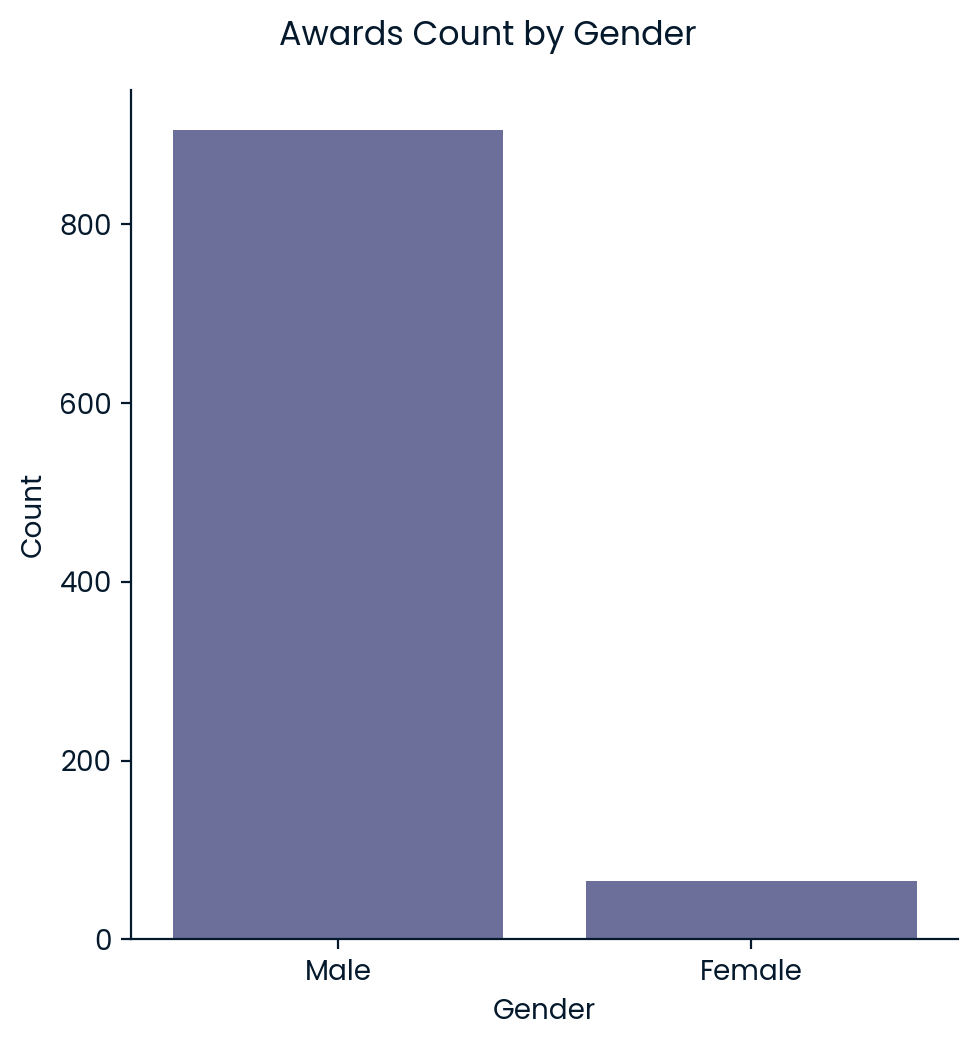

In [73]:
# plot of sex counts
g = sns.catplot(data = nobel, x = 'sex', kind = 'count')
g.fig.suptitle('Awards Count by Gender', y = 1.04)
g.set(xlabel = 'Gender', ylabel = 'Count')
plt.show()

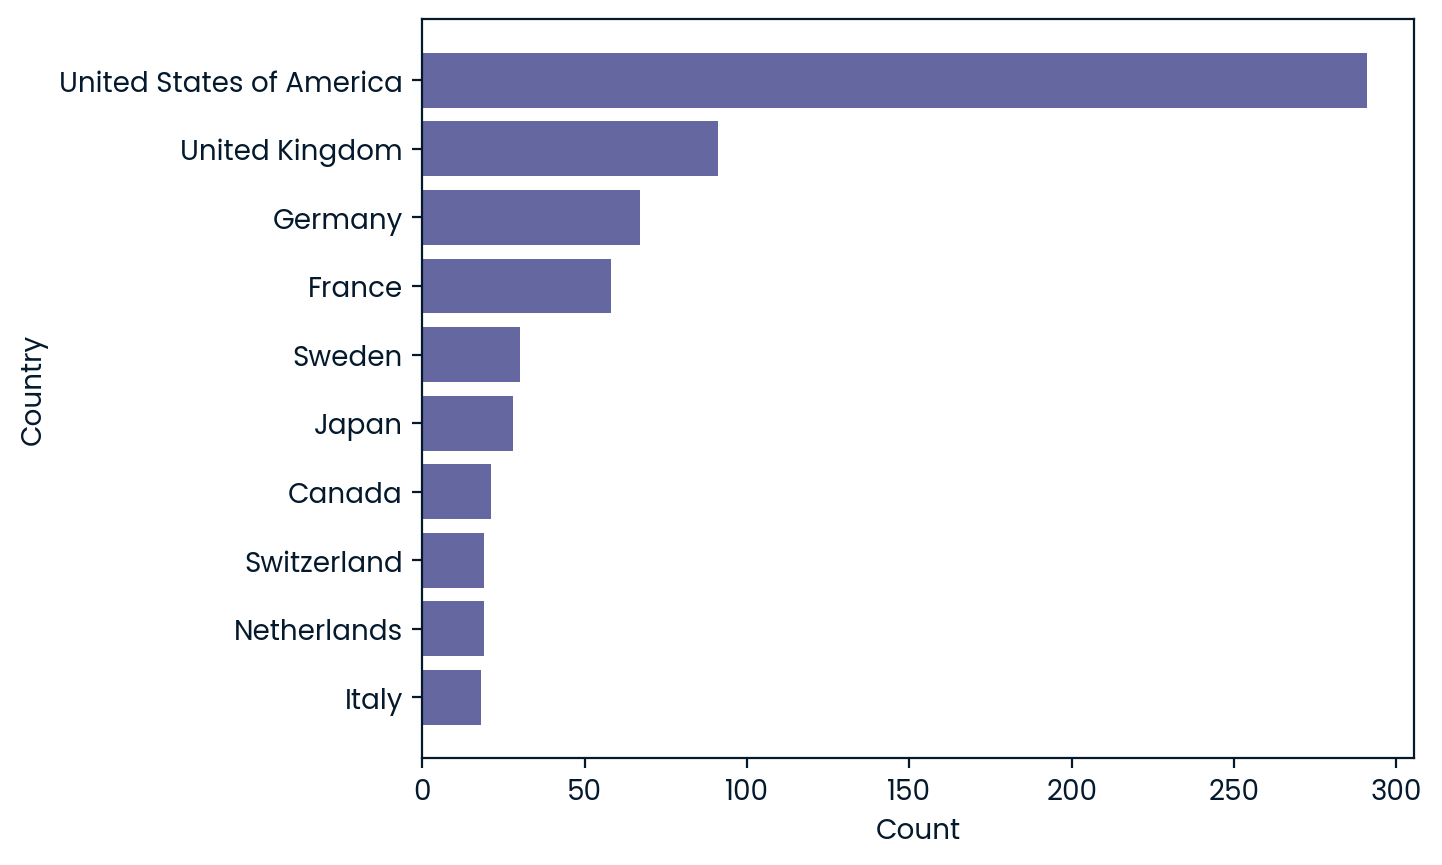

In [74]:
# plot of country counts
nobel_top10 = pd.DataFrame(nobel['birth_country'].value_counts()[:10])
plt.barh(nobel_top10.index[::-1], nobel_top10['birth_country'][::-1])
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

Q2. Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

* Store this as an integer called max_decade_usa.

In [75]:
# View the data 
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [76]:
# make fucntion to tag the decades
# we'll use it to create a new column
def decade(x):
    if x >= 1901 and x < 1910:
        return 1900
    elif x >= 1910 and x < 1920:
        return 1910
    elif x >= 1920 and x < 1930:
        return 1920
    elif x >= 1930 and x < 1940:
        return 1930
    elif x >= 1940 and x < 1950:
        return 1940
    elif x >= 1950 and x < 1960:
        return 1950
    elif x >= 1960 and x < 1970:
        return 1960
    elif x >= 1970 and x < 1980:
        return 1970
    elif x >= 1980 and x < 1990:
        return 1980
    elif x >= 1990 and x < 2000:
        return 1990
    elif x >= 2000 and x < 2010:
        return 2000
    elif x >= 2010 and x < 2020:
        return 2010
    else:
        return 2020

In [77]:
# Make a copy to avoid making permanent changes to the main df
# incase you need to revert back for errors
nob_copy = nobel.copy()
nob_copy['decade'] = nob_copy['year'].apply(lambda x : decade(x))
nob_copy.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,1900
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,1900
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,1900
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,1900
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,1900


In [78]:
# fill the lists to make visual
decades = list(nob_copy['decade'].unique())
ratios = []

# loop through each decade and calculate the ratios
for d in decades:
    ratio = len(nob_copy[(nob_copy['decade'] == d) & (nob_copy['birth_country'] == top_country)]) / len(nob_copy[nob_copy['decade'] == d])
    ratios.append(ratio) 

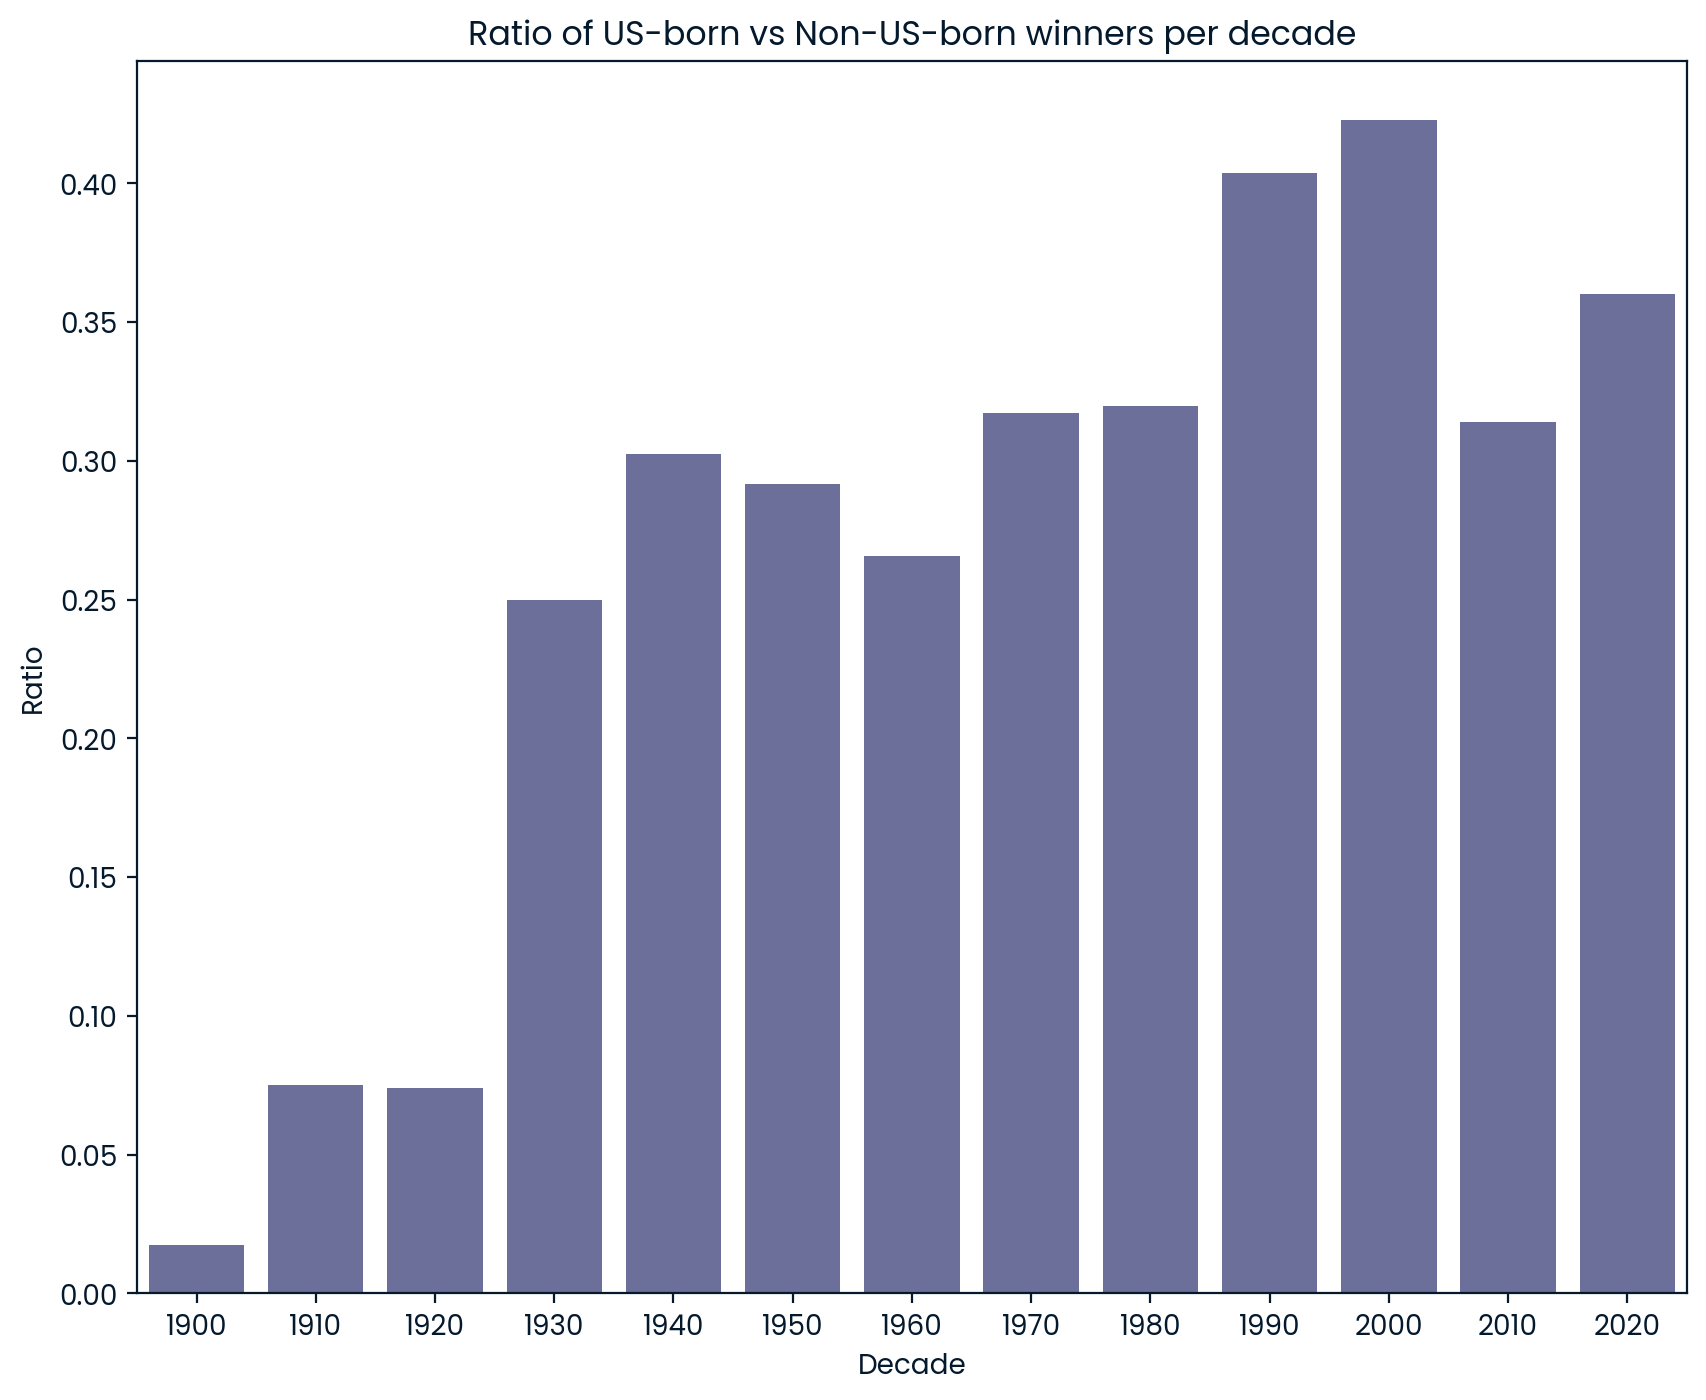

In [79]:
# make visual to see the highest decade

plt.figure(figsize = (10, 8))
g = sns.barplot(x = decades, y = ratios)
g.set_title('Ratio of US-born vs Non-US-born winners per decade')
g.set(xlabel = 'Decade', ylabel = 'Ratio')
plt.show()

In [80]:
# get the best decade ratio
max_decade_usa = 2000

Q3. Which decade and Nobel Prize category combination had the highest proportion of female laureates?

* Store this as a dictionary called max_female_dict where the decade is the key and the category is the value. There should only be one key:value pair.

In [81]:
# View the data
nob_copy.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,1900
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,1900
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,1900
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,1900
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,1900


In [82]:
# Check for nulls to know the columns the count function can be used on
nob_copy.isna().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               32
birth_city               36
birth_country            31
sex                      30
organization_name       264
organization_city       265
organization_country    265
death_date              404
death_city              421
death_country           415
decade                    0
dtype: int64

In [83]:
# count the winners by decade, category and gender
dec_cat_gen = nob_copy.groupby(['decade', 'category', 'sex'], as_index = False)['laureate_id'].agg('count')
dec_cat_gen = dec_cat_gen.rename(columns = {'laureate_id' : 'count_per_gender'})
dec_cat_gen

,decade,category,sex,count_per_gender
0,1900,Chemistry,Male,9
1,1900,Literature,Female,1
2,1900,Literature,Male,9
3,1900,Medicine,Male,11
4,1900,Peace,Female,1
...,...,...,...,...
105,2020,Medicine,Male,7
106,2020,Peace,Female,2
107,2020,Peace,Male,2
108,2020,Physics,Female,2


In [84]:
# count by decade and category
dec_cat = dec_cat_gen.groupby(['decade', 'category'], as_index = False)['count_per_gender'].sum()
dec_cat = dec_cat.rename(columns = {'count_per_gender' : 'count_per_category'})
dec_cat

,decade,category,count_per_category
0,1900,Chemistry,9
1,1900,Literature,10
2,1900,Medicine,11
3,1900,Peace,13
4,1900,Physics,13
...,...,...,...
67,2020,Economics,9
68,2020,Literature,4
69,2020,Medicine,8
70,2020,Peace,4


In [85]:
# merge the dataframes and find the proportions
merged_dec = dec_cat_gen.merge(dec_cat, on = ['decade', 'category'], how = 'left')
merged_dec['proportion'] = merged_dec['count_per_gender'] / merged_dec['count_per_category']
merged_dec

,decade,category,sex,count_per_gender,count_per_category,proportion
0,1900,Chemistry,Male,9,9,1.000000
1,1900,Literature,Female,1,10,0.100000
2,1900,Literature,Male,9,10,0.900000
3,1900,Medicine,Male,11,11,1.000000
4,1900,Peace,Female,1,13,0.076923
...,...,...,...,...,...,...
105,2020,Medicine,Male,7,8,0.875000
106,2020,Peace,Female,2,4,0.500000
107,2020,Peace,Male,2,4,0.500000
108,2020,Physics,Female,2,12,0.166667


In [86]:
# select the decade category combination with only females 
# then the highest count of female winners
fem_laureates = merged_dec[merged_dec['sex'] == 'Female'].sort_values(by = ['proportion', 'category'], ascending = [False, True])
fem_laureates

,decade,category,sex,count_per_gender,count_per_category,proportion
102,2020,Literature,Female,2,4,0.500000
94,2010,Peace,Female,5,10,0.500000
106,2020,Peace,Female,2,4,0.500000
98,2020,Chemistry,Female,3,10,0.300000
68,1990,Literature,Female,3,10,0.300000
79,2000,Literature,Female,3,10,0.300000
90,2010,Literature,Female,3,10,0.300000
33,1940,Peace,Female,1,4,0.250000
55,1970,Peace,Female,3,12,0.250000
72,1990,Peace,Female,3,14,0.214286


In [87]:
# Create a dictionary of the decade and category
# with the most female winners
top_female = list(fem_laureates[['decade', 'category']].values[0])
top_female
max_female_dict = {top_female[0] : top_female[1]}
max_female_dict

{2020: 'Literature'}

 Q4. Who was the first woman to receive a Nobel Prize, and in what category?

* Save your string answers as first_woman_name and first_woman_category.

In [88]:
# View the data
nob_copy.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,1900
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,1900
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,1900
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,1900
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,1900


In [89]:
# Filter for only females, order by year and select the first row
first_woman = nob_copy[nob_copy['sex'] == 'Female'].sort_values(by = 'year').iloc[0]
first_woman

year                                                                 1903
category                                                          Physics
prize                                     The Nobel Prize in Physics 1903
motivation              "in recognition of the extraordinary services ...
prize_share                                                           1/4
laureate_id                                                             6
laureate_type                                                  Individual
full_name                                     Marie Curie, née Sklodowska
birth_date                                                     1867-11-07
birth_city                                                         Warsaw
birth_country                                     Russian Empire (Poland)
sex                                                                Female
organization_name                                                     NaN
organization_city                     

In [90]:
# select the fullnames and category for the first female winner
first_woman_name = first_woman['full_name']
first_woman_category = first_woman['category']
print(f'The first female nobel prize winner was "{first_woman_name}" in the {first_woman_category} category')

The first female nobel prize winner was "Marie Curie, née Sklodowska" in the Physics category


Q5. Which individuals or organizations have won more than one Nobel Prize throughout the years?

* Store the full names in a list named repeat_list.

In [91]:
# view the data
nob_copy.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,1900
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,1900
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,1900
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,1900
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,1900


In [92]:
# count the number of times each name appears and filter
# for those appearing more than once
winners_count = nob_copy['full_name'].value_counts()
repeat_winners = winners_count[winners_count > 1]
repeat_winners

Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Frederick Sanger                                                                     2
Marie Curie, née Sklodowska                                                          2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
Name: full_name, dtype: int64

In [93]:
# store the names as list and print
repeat_list = list(repeat_winners.index)
print(f'Multi time winners are : {", ".join(repeat_list)}')

Multi time winners are : Comité international de la Croix Rouge (International Committee of the Red Cross), Linus Carl Pauling, John Bardeen, Frederick Sanger, Marie Curie, née Sklodowska, Office of the United Nations High Commissioner for Refugees (UNHCR)


In [94]:
# visualize 
# convert to df for sns
rep_win = pd.DataFrame(repeat_winners).reset_index().rename(columns = {'index' : 'full_name', 'full_name' : 'count'})
rep_win

,full_name,count
0,Comité international de la Croix Rouge (Intern...,3
1,Linus Carl Pauling,2
2,John Bardeen,2
3,Frederick Sanger,2
4,"Marie Curie, née Sklodowska",2
5,Office of the United Nations High Commissioner...,2


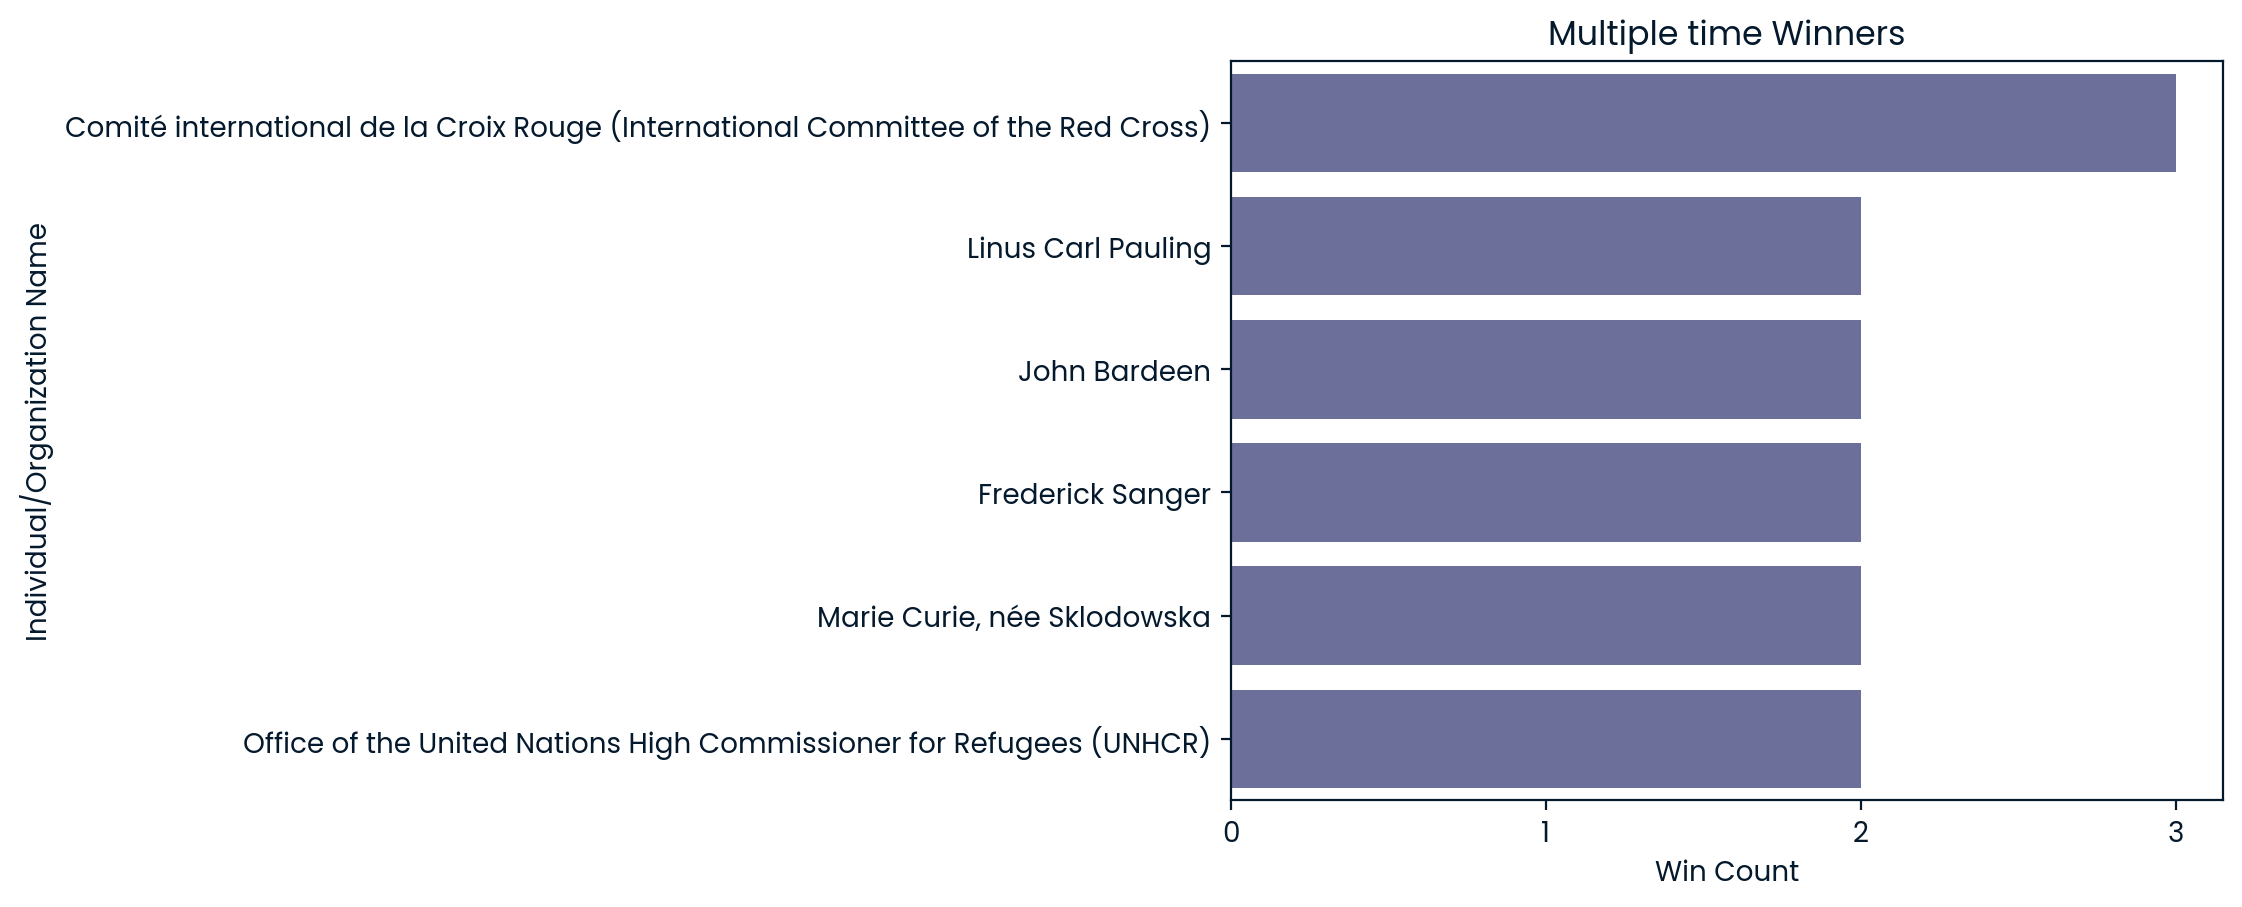

In [95]:
# make visual
g = sns.barplot(data = rep_win, x = 'count', y = 'full_name')
g.set_title('Multiple time Winners')
g.set(xlabel = 'Win Count', ylabel = 'Individual/Organization Name')
plt.xticks([0, 1, 2, 3])
plt.show()